In [3]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import datetime
from datetime import datetime

In [4]:
pip install --isolated pmdarima

Note: you may need to restart the kernel to use updated packages.


In [5]:
df = pd.read_csv('Cleaned_Dataset.csv.zip',low_memory=False, compression= 'gzip')
df

,Date,Month,Pickup_Time,lpep_pickup_datetime,lpep_dropoff_datetime,Drop_Time,PULocationID,Pickup_Zone,Pickup_Borough,Pickup_Latitude,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,trip_distance_kms,trip_duration
0,2021-01-01 00:00:00,January,19:39:11,2021-01-01 19:39:11,2021-01-01 19:45:01,19:45:01,95,Forest Hills,Queens,40.719594,...,6.50,1.0,0.5,2.08,0.0,0.3,10.38,0.0,1.915115,5.833333
1,2021-01-01 00:00:00,January,01:25:00,2021-01-01 01:25:00,2021-01-01 01:35:00,01:35:00,181,Park Slope,Brooklyn,40.670103,...,12.89,0.0,0.0,2.75,0.0,0.3,15.94,0.0,2.414010,10.000000
2,2021-01-01 00:00:00,January,01:04:00,2021-01-01 01:04:00,2021-01-01 01:12:00,01:12:00,159,Melrose South,Bronx,42.841617,...,20.53,0.0,0.0,2.75,0.0,0.3,23.58,0.0,2.864625,8.000000
3,2021-01-01 00:00:00,January,01:34:00,2021-01-01 01:34:00,2021-01-01 01:59:00,01:59:00,155,Marine Park/Mill Basin,Brooklyn,40.609833,...,23.84,0.0,0.0,2.75,0.0,0.3,26.89,0.0,8.175447,25.000000
4,2021-01-01 00:00:00,January,01:38:00,2021-01-01 01:38:00,2021-01-01 01:47:00,01:47:00,55,Coney Island,Brooklyn,40.575807,...,13.34,0.0,0.0,2.75,0.0,0.3,16.39,0.0,2.076049,9.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1014715,2021-12-31 00:00:00,December,13:42:19,2021-12-31 13:42:19,2021-12-31 13:51:52,13:51:52,49,Clinton Hill,Brooklyn,40.689722,...,8.00,0.0,0.5,1.76,0.0,0.3,10.56,0.0,2.301356,9.550000
1014716,2021-12-31 00:00:00,December,14:01:55,2021-12-31 14:01:55,2021-12-31 14:18:36,14:18:36,97,Fort Greene,Brooklyn,40.690771,...,12.50,0.0,0.5,2.66,0.0,0.3,15.96,0.0,4.554432,16.683333
1014717,2021-12-31 00:00:00,December,13:21:58,2021-12-31 13:21:58,2021-12-31 13:33:27,13:33:27,97,Fort Greene,Brooklyn,40.690771,...,9.00,0.0,0.5,0.00,0.0,0.3,9.80,0.0,2.365730,11.483333
1014718,2021-12-31 00:00:00,December,13:36:59,2021-12-31 13:36:59,2021-12-31 13:54:41,13:54:41,74,East Harlem North,Manhattan,42.057937,...,13.00,0.0,0.5,2.76,0.0,0.3,16.56,0.0,4.119910,17.700000


In [6]:
df['lpep_pickup_datetime'] = pd.to_datetime(df.lpep_pickup_datetime)
df['lpep_dropoff_datetime'] = pd.to_datetime(df.lpep_dropoff_datetime)
df['Date'] = pd.to_datetime(df.Date)

In [7]:
df.columns

Index(['Date', 'Month', 'Pickup_Time', 'lpep_pickup_datetime',
       'lpep_dropoff_datetime', 'Drop_Time', 'PULocationID', 'Pickup_Zone',
       'Pickup_Borough', 'Pickup_Latitude', 'Pickup_Longitude', 'DOLocationID',
       'Dropoff_Zone', 'Dropoff_Latitude', 'Dropoff_Longitude',
       'Dropoff_Borough', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'trip_distance_kms', 'trip_duration'],
      dtype='object')

In [8]:
df.dtypes

Date                     datetime64[ns]
Month                            object
Pickup_Time                      object
lpep_pickup_datetime     datetime64[ns]
lpep_dropoff_datetime    datetime64[ns]
Drop_Time                        object
PULocationID                      int64
Pickup_Zone                      object
Pickup_Borough                   object
Pickup_Latitude                 float64
Pickup_Longitude                float64
DOLocationID                      int64
Dropoff_Zone                     object
Dropoff_Latitude                float64
Dropoff_Longitude               float64
Dropoff_Borough                  object
trip_distance                   float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64


In [9]:
df1= df[(df['lpep_pickup_datetime'].dt.year==2021)]
df1

,Date,Month,Pickup_Time,lpep_pickup_datetime,lpep_dropoff_datetime,Drop_Time,PULocationID,Pickup_Zone,Pickup_Borough,Pickup_Latitude,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,trip_distance_kms,trip_duration
0,2021-01-01,January,19:39:11,2021-01-01 19:39:11,2021-01-01 19:45:01,19:45:01,95,Forest Hills,Queens,40.719594,...,6.50,1.0,0.5,2.08,0.0,0.3,10.38,0.0,1.915115,5.833333
1,2021-01-01,January,01:25:00,2021-01-01 01:25:00,2021-01-01 01:35:00,01:35:00,181,Park Slope,Brooklyn,40.670103,...,12.89,0.0,0.0,2.75,0.0,0.3,15.94,0.0,2.414010,10.000000
2,2021-01-01,January,01:04:00,2021-01-01 01:04:00,2021-01-01 01:12:00,01:12:00,159,Melrose South,Bronx,42.841617,...,20.53,0.0,0.0,2.75,0.0,0.3,23.58,0.0,2.864625,8.000000
3,2021-01-01,January,01:34:00,2021-01-01 01:34:00,2021-01-01 01:59:00,01:59:00,155,Marine Park/Mill Basin,Brooklyn,40.609833,...,23.84,0.0,0.0,2.75,0.0,0.3,26.89,0.0,8.175447,25.000000
4,2021-01-01,January,01:38:00,2021-01-01 01:38:00,2021-01-01 01:47:00,01:47:00,55,Coney Island,Brooklyn,40.575807,...,13.34,0.0,0.0,2.75,0.0,0.3,16.39,0.0,2.076049,9.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1014715,2021-12-31,December,13:42:19,2021-12-31 13:42:19,2021-12-31 13:51:52,13:51:52,49,Clinton Hill,Brooklyn,40.689722,...,8.00,0.0,0.5,1.76,0.0,0.3,10.56,0.0,2.301356,9.550000
1014716,2021-12-31,December,14:01:55,2021-12-31 14:01:55,2021-12-31 14:18:36,14:18:36,97,Fort Greene,Brooklyn,40.690771,...,12.50,0.0,0.5,2.66,0.0,0.3,15.96,0.0,4.554432,16.683333
1014717,2021-12-31,December,13:21:58,2021-12-31 13:21:58,2021-12-31 13:33:27,13:33:27,97,Fort Greene,Brooklyn,40.690771,...,9.00,0.0,0.5,0.00,0.0,0.3,9.80,0.0,2.365730,11.483333
1014718,2021-12-31,December,13:36:59,2021-12-31 13:36:59,2021-12-31 13:54:41,13:54:41,74,East Harlem North,Manhattan,42.057937,...,13.00,0.0,0.5,2.76,0.0,0.3,16.56,0.0,4.119910,17.700000


In [10]:
df1.columns

Index(['Date', 'Month', 'Pickup_Time', 'lpep_pickup_datetime',
       'lpep_dropoff_datetime', 'Drop_Time', 'PULocationID', 'Pickup_Zone',
       'Pickup_Borough', 'Pickup_Latitude', 'Pickup_Longitude', 'DOLocationID',
       'Dropoff_Zone', 'Dropoff_Latitude', 'Dropoff_Longitude',
       'Dropoff_Borough', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'trip_distance_kms', 'trip_duration'],
      dtype='object')

In [11]:
df1['Date'] = pd.to_datetime(df1['lpep_pickup_datetime'],errors='coerce').dt.date
df1['Pickup_Time'] = pd.to_datetime(df1['lpep_pickup_datetime']).dt.time

In [12]:
df1.duplicated().sum()

0

In [13]:
df1['row_num'] = df1.reset_index().index
df1

,Date,Month,Pickup_Time,lpep_pickup_datetime,lpep_dropoff_datetime,Drop_Time,PULocationID,Pickup_Zone,Pickup_Borough,Pickup_Latitude,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,trip_distance_kms,trip_duration,row_num
0,2021-01-01,January,19:39:11,2021-01-01 19:39:11,2021-01-01 19:45:01,19:45:01,95,Forest Hills,Queens,40.719594,...,1.0,0.5,2.08,0.0,0.3,10.38,0.0,1.915115,5.833333,0
1,2021-01-01,January,01:25:00,2021-01-01 01:25:00,2021-01-01 01:35:00,01:35:00,181,Park Slope,Brooklyn,40.670103,...,0.0,0.0,2.75,0.0,0.3,15.94,0.0,2.414010,10.000000,1
2,2021-01-01,January,01:04:00,2021-01-01 01:04:00,2021-01-01 01:12:00,01:12:00,159,Melrose South,Bronx,42.841617,...,0.0,0.0,2.75,0.0,0.3,23.58,0.0,2.864625,8.000000,2
3,2021-01-01,January,01:34:00,2021-01-01 01:34:00,2021-01-01 01:59:00,01:59:00,155,Marine Park/Mill Basin,Brooklyn,40.609833,...,0.0,0.0,2.75,0.0,0.3,26.89,0.0,8.175447,25.000000,3
4,2021-01-01,January,01:38:00,2021-01-01 01:38:00,2021-01-01 01:47:00,01:47:00,55,Coney Island,Brooklyn,40.575807,...,0.0,0.0,2.75,0.0,0.3,16.39,0.0,2.076049,9.000000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1014715,2021-12-31,December,13:42:19,2021-12-31 13:42:19,2021-12-31 13:51:52,13:51:52,49,Clinton Hill,Brooklyn,40.689722,...,0.0,0.5,1.76,0.0,0.3,10.56,0.0,2.301356,9.550000,1014715
1014716,2021-12-31,December,14:01:55,2021-12-31 14:01:55,2021-12-31 14:18:36,14:18:36,97,Fort Greene,Brooklyn,40.690771,...,0.0,0.5,2.66,0.0,0.3,15.96,0.0,4.554432,16.683333,1014716
1014717,2021-12-31,December,13:21:58,2021-12-31 13:21:58,2021-12-31 13:33:27,13:33:27,97,Fort Greene,Brooklyn,40.690771,...,0.0,0.5,0.00,0.0,0.3,9.80,0.0,2.365730,11.483333,1014717
1014718,2021-12-31,December,13:36:59,2021-12-31 13:36:59,2021-12-31 13:54:41,13:54:41,74,East Harlem North,Manhattan,42.057937,...,0.0,0.5,2.76,0.0,0.3,16.56,0.0,4.119910,17.700000,1014718


In [14]:
df2 = df1.groupby(pd.Grouper(key='lpep_pickup_datetime', axis=0, freq='H')).count()['row_num']
df2

lpep_pickup_datetime
2021-01-01 00:00:00     52
2021-01-01 01:00:00     46
2021-01-01 02:00:00     22
2021-01-01 03:00:00     21
2021-01-01 04:00:00     11
                      ... 
2021-12-31 19:00:00    124
2021-12-31 20:00:00    131
2021-12-31 21:00:00     95
2021-12-31 22:00:00     84
2021-12-31 23:00:00     53
Freq: H, Name: row_num, Length: 8760, dtype: int64

In [15]:
df2=pd.DataFrame(df2)
df2

,row_num
lpep_pickup_datetime,
2021-01-01 00:00:00,52
2021-01-01 01:00:00,46
2021-01-01 02:00:00,22
2021-01-01 03:00:00,21
2021-01-01 04:00:00,11
...,...
2021-12-31 19:00:00,124
2021-12-31 20:00:00,131
2021-12-31 21:00:00,95


In [16]:
df2.reset_index(inplace=True, level=['lpep_pickup_datetime'])
df2

,lpep_pickup_datetime,row_num
0,2021-01-01 00:00:00,52
1,2021-01-01 01:00:00,46
2,2021-01-01 02:00:00,22
3,2021-01-01 03:00:00,21
4,2021-01-01 04:00:00,11
...,...,...
8755,2021-12-31 19:00:00,124
8756,2021-12-31 20:00:00,131
8757,2021-12-31 21:00:00,95
8758,2021-12-31 22:00:00,84


In [17]:
df2.rename(columns = {'lpep_pickup_datetime':'Pickup_Time', 'row_num':'count'},inplace = True)
df2

,Pickup_Time,count
0,2021-01-01 00:00:00,52
1,2021-01-01 01:00:00,46
2,2021-01-01 02:00:00,22
3,2021-01-01 03:00:00,21
4,2021-01-01 04:00:00,11
...,...,...
8755,2021-12-31 19:00:00,124
8756,2021-12-31 20:00:00,131
8757,2021-12-31 21:00:00,95
8758,2021-12-31 22:00:00,84


In [18]:
train=df2.loc[(df2['Pickup_Time']>'2021-12-08 23:00:00') & (df2['Pickup_Time']<'2021-12-16 00:00:00')]
train

,Pickup_Time,count
8208,2021-12-09 00:00:00,43
8209,2021-12-09 01:00:00,23
8210,2021-12-09 02:00:00,16
8211,2021-12-09 03:00:00,9
8212,2021-12-09 04:00:00,16
...,...,...
8371,2021-12-15 19:00:00,187
8372,2021-12-15 20:00:00,148
8373,2021-12-15 21:00:00,112
8374,2021-12-15 22:00:00,89


In [19]:
test=df2.loc[(df2['Pickup_Time']>'2021-12-15 23:00:00') & (df2['Pickup_Time']<'2021-12-17 00:00:00')]
test

,Pickup_Time,count
8376,2021-12-16 00:00:00,39
8377,2021-12-16 01:00:00,32
8378,2021-12-16 02:00:00,21
8379,2021-12-16 03:00:00,25
8380,2021-12-16 04:00:00,21
8381,2021-12-16 05:00:00,33
8382,2021-12-16 06:00:00,99
8383,2021-12-16 07:00:00,177
8384,2021-12-16 08:00:00,223
8385,2021-12-16 09:00:00,215


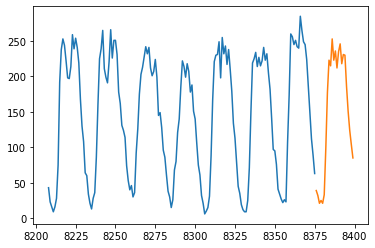

In [20]:
plt.plot(train['count'])
plt.plot(test['count'])

In [21]:
#Checking the stationarity of data using adfuller
from statsmodels.tsa.stattools import adfuller
X = train['count'].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -7.155428
p-value: 0.000000
Critical Values:
	1%: -3.473
	5%: -2.880
	10%: -2.577


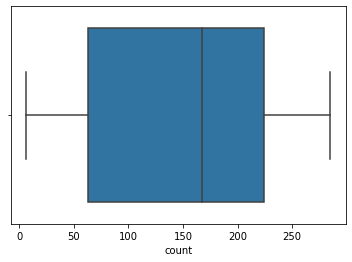

In [22]:
# Box Plot
import seaborn as sns
sns.boxplot(train['count'])

In [23]:
df2.isnull().sum()

Pickup_Time    0
count          0
dtype: int64

# Visualisation

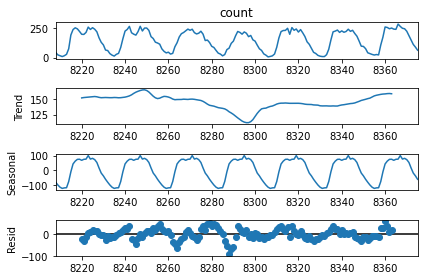

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose
result=seasonal_decompose(train['count'], model='additive', period=24)
result.plot();

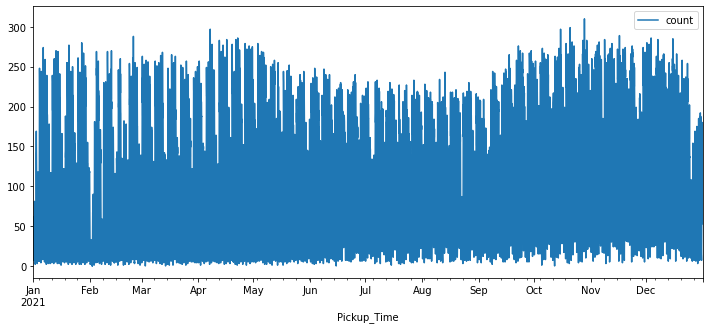

In [25]:
df2.plot(x='Pickup_Time',y='count',figsize=(12,5))

In [26]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

In [27]:
from statsmodels.tsa import stattools

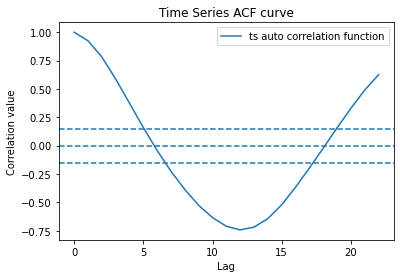

In [28]:
acf_result1 = stattools.acf(train['count'])
plt.plot(acf_result1, label = 'ts auto correlation function')
plt.axhline(y=0,linestyle='--')
#creating the 2 std dev dotted lines
plt.axhline(y=-1.96/np.sqrt(len(train['count'])),linestyle='--')
plt.axhline(y=1.96/np.sqrt(len(train['count'])),linestyle='--')
plt.ylabel('Correlation value')
plt.xlabel('Lag')
plt.title('Time Series ACF curve')
plt.legend()

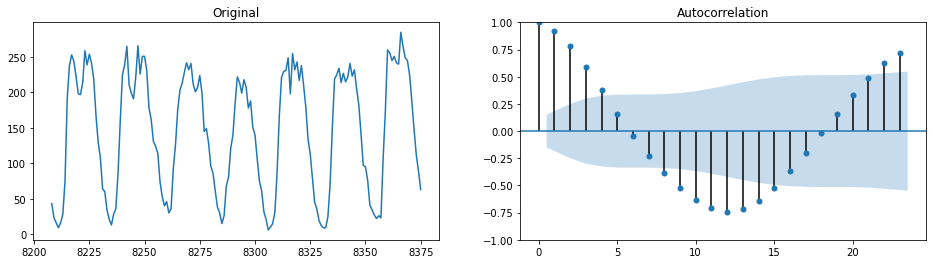

In [29]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16,4))
ax1.plot(train['count'])
ax1.set_title('Original')
plot_acf(train['count'],ax=ax2);

C:\Users\User\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


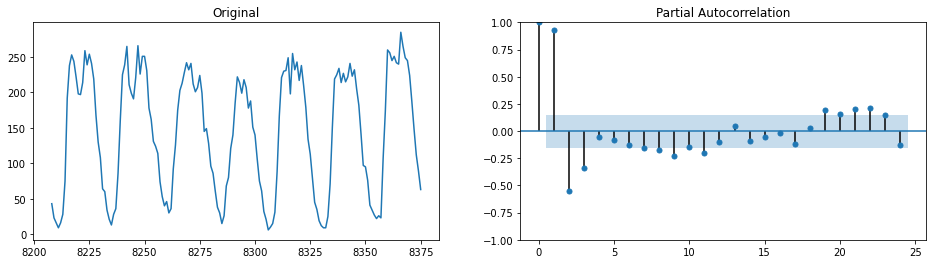

In [30]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16,4))
ax1.plot(train['count'])
ax1.set_title('Original')
plot_pacf(train['count'],ax=ax2,lags=24);

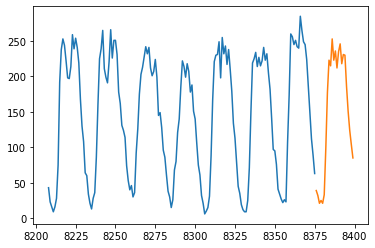

In [31]:
plt.plot(train['count'])
plt.plot(test['count'])

In [32]:
#Using ndiffs test identifying the number of times we have to differentiate in order to make it stationary
from pmdarima.arima.utils import ndiffs
ndiffs(train['count'],test ='adf')

0

In [33]:
import pmdarima as pm

In [34]:
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

In [35]:
from statsmodels.tsa.arima.model import ARIMA
model1 = ARIMA(train['count'], order=(1,0,1))
results = model1.fit()
results.summary()

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  count   No. Observations:                  168
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -800.657
Date:                Sun, 20 Nov 2022   AIC                           1609.313
Time:                        11:49:10   BIC                           1621.809
Sample:                             0   HQIC                          1614.385
                                - 168                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        137.1838     33.041      4.152      0.000      72.425     201.943
ar.L1          0.8998      0.041     21.799      0.000       0.819       0.981
ma.L1          0.3545      0.067      5.290      0.000       0.223       0.486
sigma2       796.1439     95.183      8.364      0.000     609.589     982.699
===================================================================================
Ljung-Box (L1) (Q):                   3.31   Jarque-Bera (JB):                16.65
Prob(Q):                              0.07   Prob(JB):                         0.00
Heteroskedasticity (H):               0.87   Skew:                             0.75
Prob(H) (two-sided):                  0.60   Kurtosis:                         3.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [36]:
pred1=results.forecast(24)
pred1=pd.DataFrame(pred1)
pred1

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


,predicted_mean
168,61.559042
169,69.137424
170,75.956374
171,82.091995
172,87.612764
173,92.580295
174,97.050028
175,101.071848
176,104.690640
177,107.946791


In [37]:
test.index=pred1.index
MAPE(test['count'], pred1['predicted_mean'])

78.06136806150757

In [38]:
model2 = ARIMA(train['count'], order=(2,0,1))
results = model2.fit()
results.summary()

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  count   No. Observations:                  168
Model:                 ARIMA(2, 0, 1)   Log Likelihood                -769.339
Date:                Sun, 20 Nov 2022   AIC                           1548.677
Time:                        11:49:11   BIC                           1564.297
Sample:                             0   HQIC                          1555.016
                                - 168                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        145.9857      4.484     32.554      0.000     137.196     154.775
ar.L1          1.8888      0.028     67.364      0.000       1.834       1.944
ar.L2         -0.9579      0.028    -34.500      0.000      -1.012      -0.903
ma.L1         -0.8683      0.045    -19.421      0.000      -0.956      -0.781
sigma2       542.7961     57.360      9.463      0.000     430.373     655.219
===================================================================================
Ljung-Box (L1) (Q):                   1.74   Jarque-Bera (JB):                14.15
Prob(Q):                              0.19   Prob(JB):                         0.00
Heteroskedasticity (H):               0.70   Skew:                             0.62
Prob(H) (two-sided):                  0.19   Kurtosis:                         3.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [39]:
pred2=results.forecast(24)
pred2=pd.DataFrame(pred2)
test.index=pred2.index
MAPE(test['count'], pred2['predicted_mean'])

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


21.403490263779478

In [46]:
pred2.index=test.index
pred2

,predicted_mean
Pickup_Time,
2021-12-16 00:00:00,43.625756
2021-12-16 01:00:00,32.132786
2021-12-16 02:00:00,28.982300
2021-12-16 03:00:00,34.040265
2021-12-16 04:00:00,46.611738
2021-12-16 05:00:00,65.512466
2021-12-16 06:00:00,89.171236
2021-12-16 07:00:00,115.754626
2021-12-16 08:00:00,143.304601


In [47]:
train.reset_index(inplace=True)

In [49]:
train.set_index('Pickup_Time',inplace=True)
train

KeyError: "None of ['Pickup_Time'] are in the columns"

In [50]:
test.set_index('Pickup_Time',inplace=True)
test

KeyError: "None of ['Pickup_Time'] are in the columns"

Text(0, 0.5, 'Trip Count')

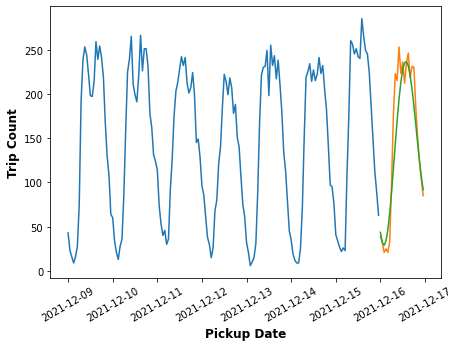

In [51]:
figure(figsize=(7, 5))
plt.plot(train['count'])
plt.plot(test['count'])
plt.plot(pred2['predicted_mean'])
plt.xticks(rotation = 30)
plt.xlabel('Pickup Date', fontweight='bold',fontsize='12', horizontalalignment='center')
plt.ylabel('Trip Count', fontweight='bold',fontsize='12', horizontalalignment='center')

In [52]:
test_=pd.concat([test,pred2],axis=1)
test_

,count,predicted_mean
Pickup_Time,,
2021-12-16 00:00:00,39,43.625756
2021-12-16 01:00:00,32,32.132786
2021-12-16 02:00:00,21,28.982300
2021-12-16 03:00:00,25,34.040265
2021-12-16 04:00:00,21,46.611738
2021-12-16 05:00:00,33,65.512466
2021-12-16 06:00:00,99,89.171236
2021-12-16 07:00:00,177,115.754626
2021-12-16 08:00:00,223,143.304601


Text(0, 0.5, 'Trip Count')

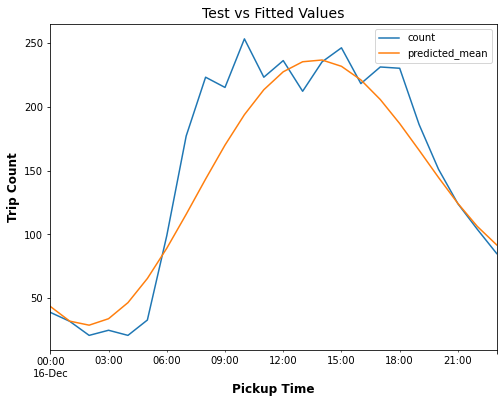

In [53]:
from matplotlib.pyplot import figure
test_.plot(figsize=(8,6))
plt.title("Test vs Fitted Values",fontsize='14', horizontalalignment='center')
plt.xlabel('Pickup Time', fontweight='bold',fontsize='12', horizontalalignment='center')
plt.ylabel('Trip Count', fontweight='bold',fontsize='12', horizontalalignment='center')

In [92]:
model3 = ARIMA(train['count'], order=(3,0,1))
results = model3.fit()
results.summary()

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  count   No. Observations:                  168
Model:                 ARIMA(3, 0, 1)   Log Likelihood                -768.279
Date:                Sun, 20 Nov 2022   AIC                           1548.559
Time:                        12:16:26   BIC                           1567.303
Sample:                    12-09-2021   HQIC                          1556.166
                         - 12-15-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        145.8001      4.264     34.194      0.000     137.443     154.157
ar.L1          2.0104      0.094     21.411      0.000       1.826       2.194
ar.L2         -1.1922      0.172     -6.935      0.000      -1.529      -0.855
ar.L3          0.1229      0.089      1.382      0.167      -0.051       0.297
ma.L1         -0.8914      0.051    -17.482      0.000      -0.991      -0.791
sigma2       536.1486     57.319      9.354      0.000     423.805     648.492
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                13.20
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               0.72   Skew:                             0.61
Prob(H) (two-sided):                  0.21   Kurtosis:                         3.63
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [93]:
pred3=results.forecast(24)
pred3=pd.DataFrame(pred3)
test.index=pred3.index
MAPE(test['count'], pred3['predicted_mean'])

22.74034661017375

In [56]:
model4 = ARIMA(train['count'], order=(2,0,12))
results = model4.fit()
results.summary()

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  count   No. Observations:                  168
Model:                ARIMA(2, 0, 12)   Log Likelihood                -752.990
Date:                Sun, 20 Nov 2022   AIC                           1537.980
Time:                        12:05:10   BIC                           1587.964
Sample:                    12-09-2021   HQIC                          1558.266
                         - 12-15-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        144.2033      4.720     30.552      0.000     134.952     153.454
ar.L1          1.9308      0.002    882.587      0.000       1.927       1.935
ar.L2         -0.9994      0.002   -548.885      0.000      -1.003      -0.996
ma.L1         -0.9529      0.077    -12.331      0.000      -1.104      -0.801
ma.L2          0.0362      0.106      0.342      0.733      -0.172       0.244
ma.L3         -0.2116      0.122     -1.732      0.083      -0.451       0.028
ma.L4          0.0624      0.129      0.483      0.629      -0.191       0.316
ma.L5          0.0353      0.118      0.298      0.766      -0.197       0.267
ma.L6          0.0896      0.114      0.784      0.433      -0.134       0.313
ma.L7          0.1570      0.128      1.229      0.219      -0.093       0.407
ma.L8          0.0472      0.124      0.381      0.704      -0.196       0.290
ma.L9         -0.0609      0.115     -0.528      0.597      -0.287       0.165
ma.L10         0.0813      0.138      0.588      0.557      -0.190       0.352
ma.L11        -0.0449      0.139     -0.322      0.747      -0.318       0.228
ma.L12        -0.0694      0.094     -0.739      0.460      -0.253       0.115
sigma2       434.3578     50.545      8.593      0.000     335.291     533.425
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                10.13
Prob(Q):                              0.94   Prob(JB):                         0.01
Heteroskedasticity (H):               0.69   Skew:                             0.57
Prob(H) (two-sided):                  0.18   Kurtosis:                         3.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [57]:
pred4=results.forecast(24)
pred4=pd.DataFrame(pred4)
test.index=pred4.index
MAPE(test['count'], pred4['predicted_mean'])

23.02873239285904

In [94]:
model5 = ARIMA(train['count'], order=(2,0,2))
results = model5.fit()
results.summary()

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  count   No. Observations:                  168
Model:                 ARIMA(2, 0, 2)   Log Likelihood                -768.499
Date:                Sun, 20 Nov 2022   AIC                           1548.997
Time:                        12:16:59   BIC                           1567.741
Sample:                    12-09-2021   HQIC                          1556.604
                         - 12-15-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        145.8510      4.315     33.801      0.000     137.394     154.308
ar.L1          1.8837      0.029     64.020      0.000       1.826       1.941
ar.L2         -0.9517      0.030    -32.032      0.000      -1.010      -0.893
ma.L1         -0.7858      0.074    -10.635      0.000      -0.931      -0.641
ma.L2         -0.0878      0.079     -1.106      0.269      -0.243       0.068
sigma2       537.4563     57.052      9.420      0.000     425.636     649.277
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                13.44
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               0.71   Skew:                             0.61
Prob(H) (two-sided):                  0.21   Kurtosis:                         3.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [95]:
pred5=results.forecast(24)
pred5=pd.DataFrame(pred5)
test.index=pred5.index
MAPE(test['count'], pred5['predicted_mean'])

22.078229586422818

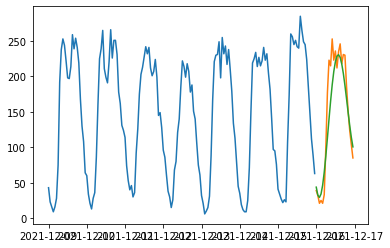

In [60]:
plt.plot(train['count'])
plt.plot(test['count'])
plt.plot(pred5['predicted_mean'])

In [105]:
model6 = ARIMA(train['count'], order=(2,0,4))
results = model6.fit()
results.summary()

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters fo

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  count   No. Observations:                  168
Model:                 ARIMA(2, 0, 4)   Log Likelihood                -766.165
Date:                Sun, 20 Nov 2022   AIC                           1548.329
Time:                        20:50:51   BIC                           1573.321
Sample:                    12-09-2021   HQIC                          1558.472
                         - 12-15-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        145.8635      4.166     35.015      0.000     137.699     154.028
ar.L1          1.8895      0.029     64.241      0.000       1.832       1.947
ar.L2         -0.9568      0.031    -31.351      0.000      -1.017      -0.897
ma.L1         -0.7996      0.078    -10.196      0.000      -0.953      -0.646
ma.L2          0.0089      0.098      0.091      0.927      -0.183       0.201
ma.L3         -0.2118      0.111     -1.909      0.056      -0.429       0.006
ma.L4          0.1284      0.096      1.333      0.182      -0.060       0.317
sigma2       522.2663     56.359      9.267      0.000     411.804     632.728
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                13.50
Prob(Q):                              0.80   Prob(JB):                         0.00
Heteroskedasticity (H):               0.70   Skew:                             0.61
Prob(H) (two-sided):                  0.18   Kurtosis:                         3.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [97]:
pred6=results.forecast(24)
pred6=pd.DataFrame(pred6)
test.index=pred6.index
MAPE(test['count'], pred6['predicted_mean'])

20.99014182236657

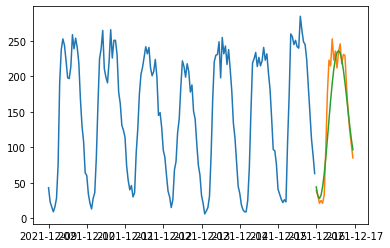

In [98]:
plt.plot(train['count'])
plt.plot(test['count'])
plt.plot(pred6['predicted_mean'])

In [103]:
test__=pd.concat([test,pred6],axis=1)
test__
test__.rename(columns = {'predicted_mean':'forecasted_values','count':'actual_values'}, inplace = True)

In [1]:
from matplotlib.pyplot import figure
test__.plot(figsize=(8,6))
plt.title("Test vs Fitted Values",fontsize='14', horizontalalignment='center')
plt.xlabel('Pickup Time', fontweight='bold',fontsize='12', horizontalalignment='center')
plt.ylabel('Trip Count', fontweight='bold',fontsize='12', horizontalalignment='center')

NameError: name 'test__' is not defined